In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True,axis=0)

In [5]:
df = pd.get_dummies(df, columns=['Family', 'Education'])

In [6]:
df

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,1.6,0,0,1,0,0,0,False,False,False,True,True,False,False
1,45,19,34,1.5,0,0,1,0,0,0,False,False,True,False,True,False,False
2,39,15,11,1.0,0,0,0,0,0,0,True,False,False,False,True,False,False
3,35,9,100,2.7,0,0,0,0,0,0,True,False,False,False,False,True,False
4,35,8,45,1.0,0,0,0,0,0,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,1,0,True,False,False,False,False,False,True
4996,30,4,15,0.4,85,0,0,0,1,0,False,False,False,True,True,False,False
4997,63,39,24,0.3,0,0,0,0,0,0,False,True,False,False,False,False,True
4998,65,40,49,0.5,0,0,0,0,1,0,False,False,True,False,False,True,False


In [7]:
X = df.drop(columns=['Personal Loan'])
Y = df['Personal Loan']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)

In [9]:
rp = classification_report(Y_test,y_pred)
print(rp)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       895
           1       0.55      0.63      0.58       105

    accuracy                           0.91      1000
   macro avg       0.75      0.78      0.77      1000
weighted avg       0.91      0.91      0.91      1000



In [10]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)

print(f"precision = {precision*100}")
print(f"recall = {recall*100}")
print(f"f1-score = {f1*100}")

precision = 54.54545454545454
recall = 62.857142857142854
f1-score = 58.4070796460177


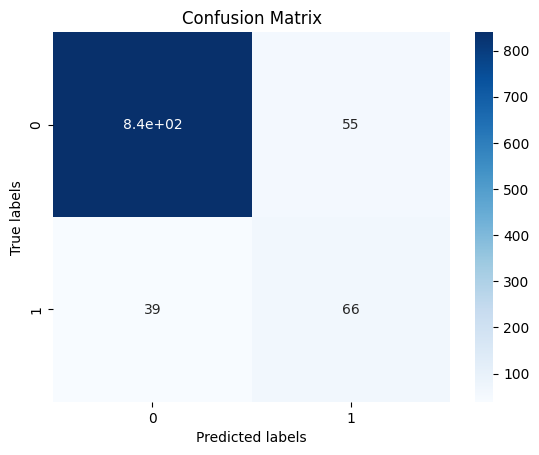

In [11]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

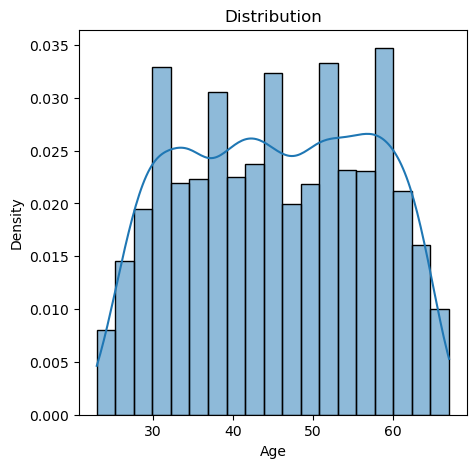

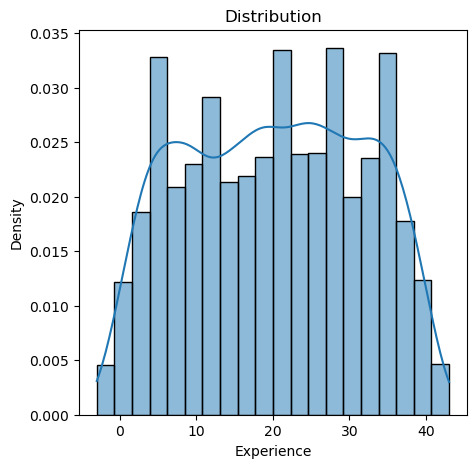

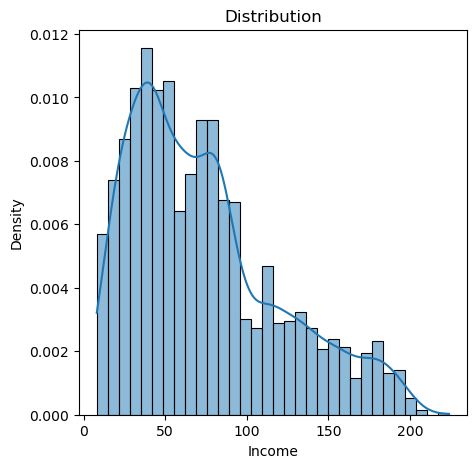

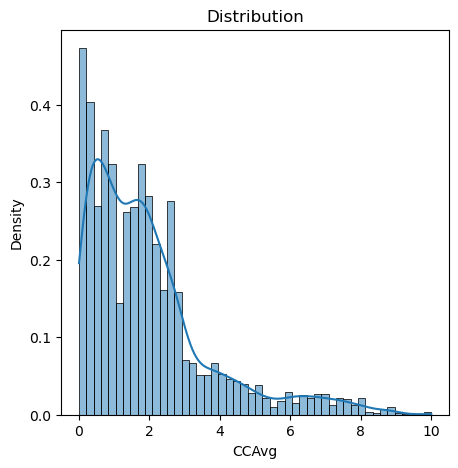

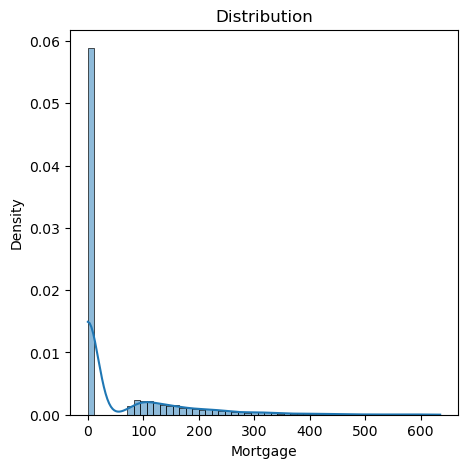

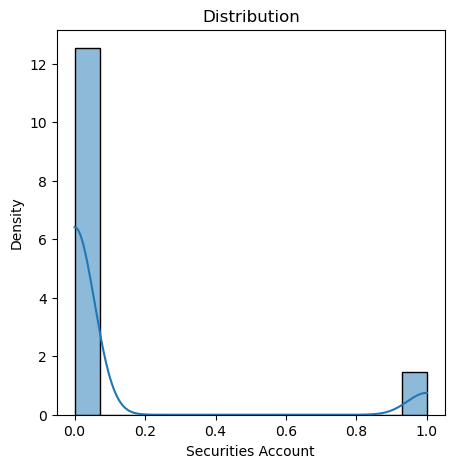

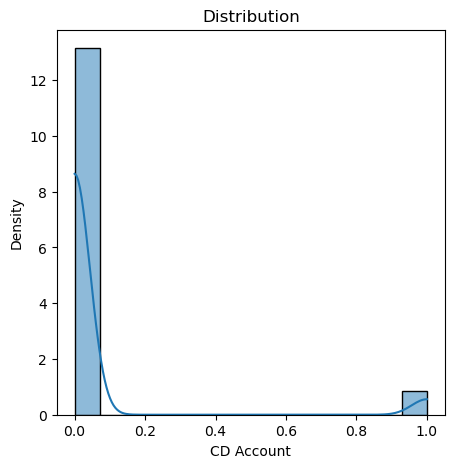

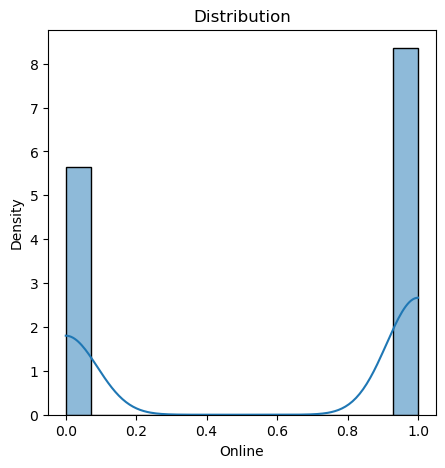

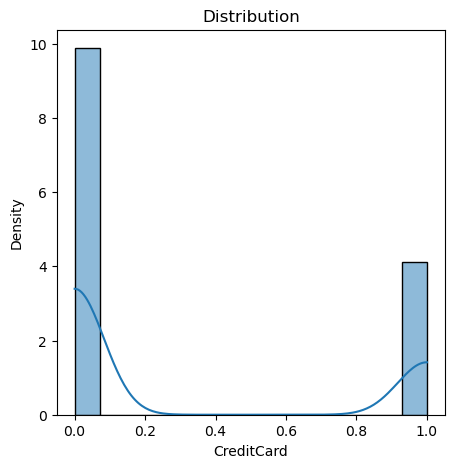

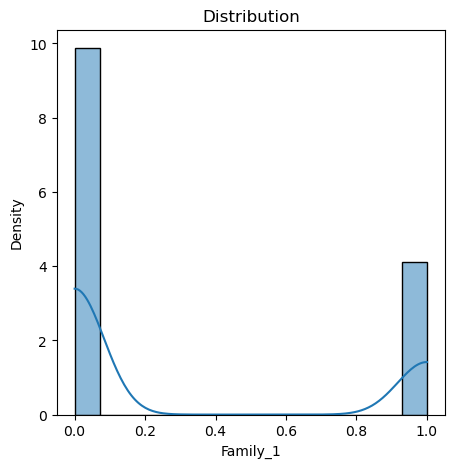

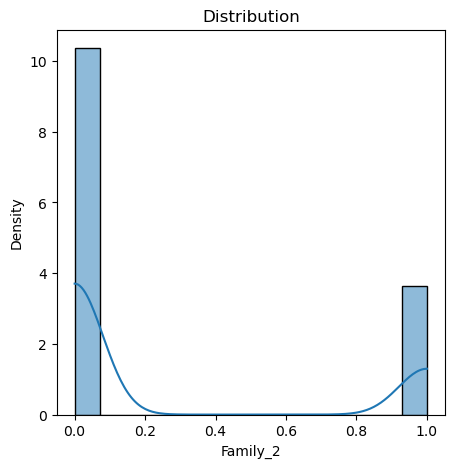

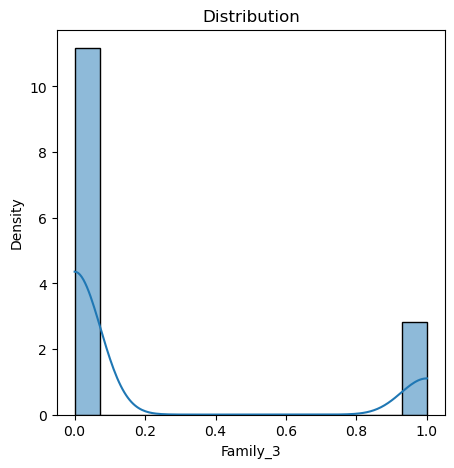

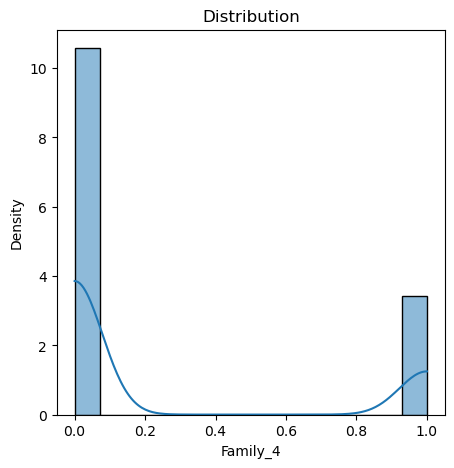

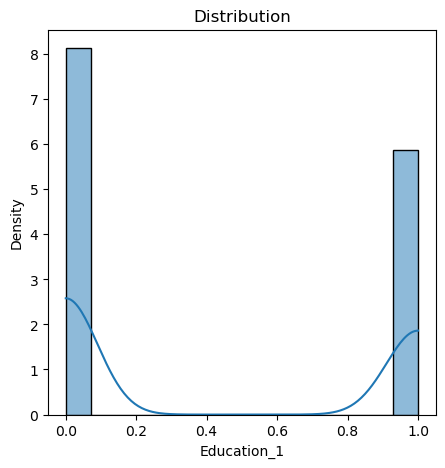

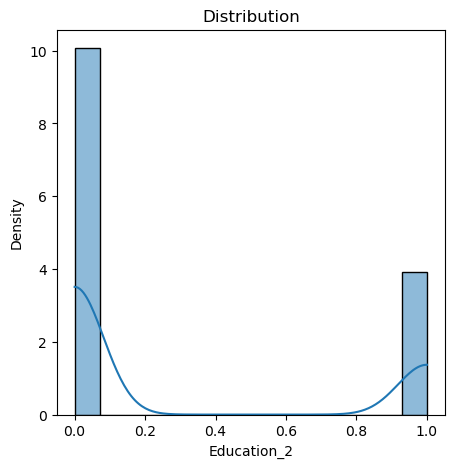

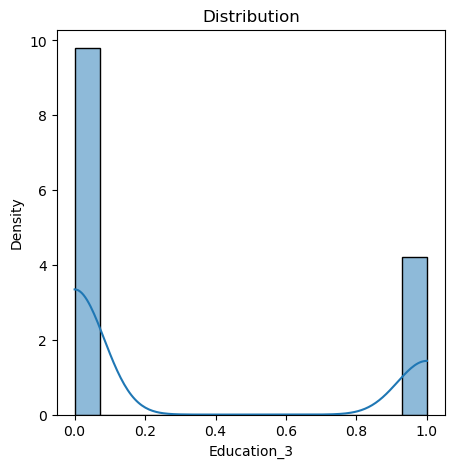

In [36]:
X_features = X.columns

# Plot the distribution of input features

for i, feature in enumerate(X_features, 1):
    plt.figure(figsize=(5,5))
    sns.histplot(X[feature],kde = True ,stat="density")
    plt.title("Distribution")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

In [12]:
select = [0,1,2]
X = df.iloc[:,select]
Y = df['Personal Loan']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,Y_train)
y_pred = nb_classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 

In [16]:
def predict_loan_approval(age,experience,income):
    input_data = pd.DataFrame({'Age': [age], 'Experience': [experience],'Income': [income]})
    
    prediction = nb_classifier.predict(input_data)
    
    if prediction[0] == 1:
        return "Loan Approved"
    else:
        return "Loan Not Approved"

age = 35
income = 80000
experience = 10
prediction = predict_loan_approval(age,experience,income)
print(f"For Age={age}, Income={income}, Experience={experience}: {prediction}")

[0]
For Age=35, Income=80000, Experience=10: Loan Not Approved


In [15]:
columns = print(list(df))

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2', 'Education_3']
